In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from IPython.display import Image, display_html, display, Math, HTML

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Continuous Distributions

Today we'll talk about __continuous__ distributions - probability distributions of continuous random variables. 

We will start by reviewing some concepts from integral calculus. Then we will apply these concepts to answer various probability questions and compute expectation and variance of continuous random variables. In the final part of the lecture we will focus the common continuous distributions, such as the continuous version of the uniform distribution.

## Review of Integrals

### Area Under the Curve
Consider a function $f$ defined for $a\leq x \leq b$. We divide the interval $[a,b]$ into $n$ subintervals of equal width, $\Delta x = \frac{b-a}{n}.$ In addition, we let $x_0 = a, x_1, x_2, \dots, x_n = b$ be the endpoints of these intervals. Finally, we let $x_1^{\ast}, x_2^{\ast}, \dots, x_n^{\ast}$ be any sample points within these intervals, so $x_i^{\ast}$ lies in the $i$th subinterval $[x_{i-1}, x_i]$.  

Then $\int_a^b f(x) dx$ can be viewed as the sum $\sum_{k=1}^n f(x_k^{\ast}) \Delta x$ for $n$ approaching infinity.

Mathematically, we write this as 

$$\int_a^b f(x) dx = \lim_{n \to \infty} \sum_{k=1}^n f(x_k^{\ast}) \Delta x.$$

<center>

<img src="images/Bernhard_Riemann.jpeg" width="250px">
    
</center>

<center>
Bernhard Riemann (1826-1866)
</center>

<!-- From https://en.wikipedia.org/wiki/Bernhard_Riemann#/media/File:Georg_Friedrich_Bernhard_Riemann.jpeg -->

The sum $\sum_{k=1}^n f(x_k^{\ast}) \Delta x$ is called a _Riemann sum_ after the German mathematician Bernhard Riemann.

If the function $f$ is positive (assumes only positive values) then the Riemann sum can be interpreted as a sum of areas of approximating rectangles. Therefore, for a positive $f$ the integral $\int_a^b f(x) dx$  is the area under the curve $y=f(x)$ from $a$ to $b$.

<center>

<img src="images/Riemann_sum.png" width="500px">
    
</center>

<!-- By Jennifer Balakrishnan, MA124 Calculus II -->

- The symbol $\int$ was introduced by Leibniz and is called an _integral sign_. It is an elongated $S$ and was chosen because an integral is a limit of sums.
  

- In the notation $\int_a^bf(x) dx$, $f(x)$ is the _integrand_ and $a$ and $b$ are called the _limits of integration_: $a$ is the _lower limit_ and $b$ is the _upper limit_.

- The symbol $dx$ has no official meaning by itself.

- A _definite integral_ is the integral that represents the area under a curve between two fixed limits of integration.

- We say that a function $f$ defined on $[a,b]$ is _integrable_ on $[a,b]$ if $\lim_{n \to \infty} \sum_{k=1}^n f(x_k^{\ast}) \Delta x$ exists.

### Properties of the Integral

Here are some very important properties of definite integrals.

Let $f$ and $g$ be integrable functions on $[a,b]$ and let $c$ be any constant.

- $\int_a^a f(x) dx = 0$.
- $\int_b^a f(x) dx = -\int_a^b f(x) dx$.
- $\int_a^b \left(f(x)+g(x)\right) dx = \int_a^b f(x)dx + \int_a^b g(x)dx$.
- $\int_a^b c f(x) dx = c \int_a^b f(x) dx$.
- $\int_a^b f(x) dx = \int_a^p f(x) dx + \int_p^b f(x)dx$ for any $p \in [a,b].$

### The Fundamental Theorem of Calculus

The Fundamental Theorem of Calculus establishes a connection between the two branches of calculus: differential calculus and integral calculus. Differential calculus arose from the tangent problem, whereas the integral calculus arose from a seemingly unrelated problem, the area problem.  

<center>

<img src="images/Isaac_Barrow.jpg" width="250px">
    
</center>

<center>
Isaac Barrow (1630 - 1677)
</center>

<!-- From https://en.wikipedia.org/wiki/Isaac_Barrow#/media/File:Isaac_Barrow_by_Mary_Beale.jpg -->

Isaac Barrow discovered that these two problems are actually closely related. In fact, he realized that differentiation and integration are inverse processes. The Fundamental Theorem of Calculus gives the precise inverse relationship between the derivative and the integral.

A function $F$ is called an _antiderivative_ of $f$ on an interval $I$ if $F'(x) = f(x)$ for all $x$ in $I$.

__Example__. Let $f(x) = x^2$. If $F(x) = \frac{1}{3}x^3$, then $F'(x) = x^2 = f(x).$ Thus, $F(x) = \frac{1}{3}x^3$ is an antiderivative of $f(x) = x^2$. It should be noted that $F_1(x) = \frac{1}{3}x^3 + 100$ also satisfies $F_1'(x) = x^2$ and, hence, is also an antiderivative of $f(x) = x^2$.

__The Fundamental Theorem of Calculus. Part 1.__ If $f$ is continuous on $[a,b]$, then the function $g$ defined by 

$$g(x) = \int_a^x f(t) dt \quad a\leq x \leq b$$

is continuous on $[a,b]$ and differentiable on $(a,b)$, and $g'(x) = f(x)$.

__The Fundamental Theorem of Calculus. Part 2.__ If $f$ is continuous on $[a,b]$, then 

$$\int_a^b f(x) dx = F(b) - F(a),$$

where $F$ is any antiderivative of $f$, that is, a function such that $F' = f$.

Both parts of the Fundamental Theorem of Calculus establish connections between antiderivatives and definite integrals. Part 1 says that if $f$ is continuous, then $\int_a^x f(t) dt$ is an antiderivative of $f$. Part 2 says that $\int_a^b f(x) dx$ can be found by evaluating $F(b) - F(a)$.

We need a convenient notation for antiderivatives that makes them easy to work with. Traditionally, the notation $\int f(x) dx$ is used for antiderivatives of $f$ and is called an _indefinite integral_. 

This implies that

$$\int f(x) dx = F(x) \: \text{ means } \:F'(x) = f(x).$$

For example, we can write

$$\int x^2 dx = \frac{x^3}{3} + C \: \text{ because } \:\frac{d}{dx}\left( \frac{x^3}{3} + C \right) = x^2.$$

So we can regard an indefinite integral as representing an entire __family__ of functions, one antiderivative for each value of the constant $C$.

You should distinguish carefully between definite and indefinite integrals. A definite integral $\int_a^b f(x) dx$ is a __number__, whereas an indefinite integral $\int f(x) dx$ is a __function__ (or a family of functions).

The connection between definite and indefinite integrals is given by Part 2 of the Fundamental Theorem. If $f$ is continuous on $[a,b]$, then 

$$ \int_a^b f(x) dx = \left[ \int f(x) dx \right]_a^b.$$

### Elementary Integrals

Here is the list of integrals that you should know for this course.

- $\int_a^b c dx = c(b - a)$ for any constant $c$,
- $\int_a^b x^n dx = \frac{1}{n+1}\left[x^{n+1}\right]_{x=a}^{x=b}$ for $n \neq -1$,
- $\int_a^b \frac{1}{x}dx = \left[\ln |x| \right]_{x=a}^{x=b}$,
- $\int_a^b e^x dx = \left[ e^x \right]_{x=a}^{x=b}$.


__Examples.__
1. Find $\int_{-2}^2 (2 + 5x) dx.$
   
   $$\int_{-2}^2 (2 + 5x) dx = \int_{-2}^2 2 dx + \int_{-2}^2 5 x dx = 2(2-(-2)) + 5 \left[\frac{1}{2}x^2\right]_{x=-2}^{x=2} = 8 + \frac{5}{2} (2^2 - (-2)^2) = 8 + 0 =8.$$

2. Find the area under the parabola $y=x^2$ from 0 to 1.
   The required area is equal to

   $$\int_0^1  x^2 dx = \left[\frac{1}{3}x^3 \right]_{x=0}^{x=1} = \frac{1}{3}\left[x^3 \right]_{x=0}^{x=1} = \frac{1}{3} (1^3 - 0^3) = \frac{1}{3}.$$

3. Evaluate $\int_3^6 \frac{1}{x}dx.$

$$\int_3^6 \frac{1}{x}dx = [\ln x]_{x=3}^{x=6} = \ln 6 - \ln 3 = \ln \frac{6}{3} = \ln 2.$$

### Improper Integrals

So far we assumed that a definite integral $\int_a^b f(x) dx$ was defined on a __finite__ interval $[a,b]$. An _improper_ integral extends the concept of a definite integral to __infinite__ intervals. 

__Definition.__ If $\int_a^t f(x) dx$ exists for every number $t \geq a$, then

$$\int_a^{\infty} f(x)dx = \lim_{t \to \infty} \int_a^t f(x) dx$$

provided this limit exists (as a finite number).

__Definition.__ If $\int_t^b f(x) dx$ exists for every number $t \leq b$, then

$$\int_{-\infty}^b f(x)dx = \lim_{t \to -\infty} \int_t^b f(x) dx.$$

provided this limit exists (as a finite number).

__Definition.__ The improper integrals $\int_a^{\infty} f(x)dx$ and $\int_{-\infty}^b f(x)dx$ are called _convergent_ if the corresponding limits exist. They are called _divergent_ if the limits do not exist.

__Definition.__ If both $\int_a^{\infty} f(x)dx$ and $\int_{-\infty}^b f(x)dx$ are convergent, then we define 

$$\int_{-\infty}^{\infty} f(x) dx = \int_{-\infty}^a f(x) dx + \int_a^{\infty} f(x) dx,$$

where $a$ is any real number.

__Example.__ Determine whether the integral $\int_1^{\infty} (1/x) dx$ is convergent or divergent.

__Solution.__

$$\int_1^{\infty} \frac{1}{x}dx = \lim_{t \to \infty} \int_1^t \frac{1}{x}dx = \lim_{t \to \infty} \left[ \ln |x| \right]_1^t = \lim_{t \to \infty} (\ln \:t - \ln \:1) = \lim_{t \to \infty} \ln \:t.$$



```Important: The notation in the Review of Integrals is unrelated to the notation in the remaining part of the lecture.```

## Probability Density Function

Continuous random variables are described by their _probability density functions (PDFs)_. If $f$ is a PDF, then it has the following properties:

- $ f(x) \geq 0,$
- $ \int_{- \infty}^{\infty} f(x) dx = 1.$

 

In addition, if $F$ is the corresponding CDF, then

- $f(x) = \frac{d F(x)}{dx},$ and
- $F(a) = P(X\leq a) = \int_{-\infty}^a f(x) dx.$

The probability density function plays a central role in probability theory, because all probability statements about a continuous random variable can be answered in terms of its PDF. For instance, for a continuous variable $X$ from $P(X\leq a) = \int_{-\infty}^a f(x) dx$, we obtain

$$P(a \leq X \leq b) = P(X \leq b) - P(X \leq a) = \int_{-\infty}^b f(x) dx - \int_{-\infty}^a f(x) dx = \int_a^b f(x) dx.$$

<center>

<img src="images/Pdf_integral.png" width="400px">
    
</center>


Note: If we let $a = b$, then

$$P(b\leq X \leq b) = P(X = b) = \int_b^b f(x) dx = 0.$$

Although this result might seem strange initially, it is really quite natural. Imagine that a continuous variable had a positive probability of being any particular value, then the same should hold for all its possible values. In that case, the total sum of the probabilities would be infinite.

__Example.__ Suppose that $X$ is a continuous random variable with probability density function 

$$ f(x) = \;\left\{\begin{array}{cr} c(4x - 2x^2) & \text{for  } 0<x<2,\\ 0 & \text{otherwise. }\end{array}\right.$$ 

Here $c$ is a constant. <br>
a. What is the value of $c$? <br>
b. Find $P(X>1).$


__Solution.__ a. Since $f$ is a probability density function, we must have $\int_{-\infty}^{\infty} f(x)dx = 1.$ This is equivalent to

$$\int_0^2 c(4x-2x^2) dx = 1,$$

because the PDF is non-zero only on the interval $(0,2)$. 

Let us first compute the integral 

$$\int_0^2 c(4x-2x^2) dx = c \int_0^2 (4x-2x^2) dx = c \left[ \frac{4}{2}x^2 - \frac{2}{3} x^3 \right]_{x=0}^{x=2} $$

$$ = c \left[2x^2 -  \frac{2}{3} x^3 \right]_{x=0}^{x=2} = c\left(2\cdot 2^2 - \frac{2}{3}\cdot 2^3\right) - 0 = c\left(8 - \frac{16}{3}\right) = \frac{8}{3}c.$$

Since $\frac{8}{3}c = 1$, we find that $c = \frac{3}{8}.$

b. 

$$P(X>1) = \int_1^{\infty} f(x) dx = \int_1^{2} \frac{3}{8} (4x - 2x^2) dx = \frac{3}{8} \left[ 2x^2 -  \frac{2}{3} x^3  \right]_{x=1}^{x=2}$$

$$ = \frac{3}{8} \left[ 2x^2 -  \frac{2}{3} x^3  \right]_{x=1}^{x=2} = \frac{3}{8} \left[\left(2\cdot4 - \frac{2}{3}\cdot 8\right) - \left( 2 - \frac{2}{3} \right) \right] = \frac{1}{2}.$$

## Expected Value

In one of the previous lectures we defined the expected value of a continuous random variable $X$ as

$$E[X] = \int_{-\infty}^{\infty} x f(x) dx.$$

Since often the set of possible values of $X$ is restricted to a certain interval, we can use definite integrals to compute the expected values using the above definition.

__Example.__ Find $E[X]$ when the density function of $X$ is 

$$ f(x) = \;\left\{\begin{array}{cr} 2x & \text{for  } 0\leq x \leq 1, \\ 0 & \text{otherwise. }\end{array}\right.$$ 


__Solution.__ 

$$E[X] = \int_{-\infty}^{\infty} x f(x) dx = \int_0^1 x \cdot 2x \:dx = \int_0^1 2x^2 dx = 2 \int_0^1 x^2 dx = 2 \left[ \frac{1}{3}x^3\right]_{x=0}^{x=1} = \frac{2}{3}.$$

## Variance

We have defined the variance of a random variable $X$ as 

$$\mbox{Var} (X) = E\left[(X- \overline{X})^2 \right].$$ 

We also said that for a discrete random variable with PMF $p$ and $\overline{X} = \mu$, the variance can be computed from

$$\mbox{Var} (X) = \sum_{x= -\infty}^{\infty} (x - \mu)^2 p(x).$$

Similarly, for a continuous random variable with density function $f(x)$ and $\overline{X} = \mu$

$$\mbox{Var}(X) = \int_{-\infty}^{\infty} (x - \mu)^2 f(x) dx.$$

## The Continuous Uniform Distribution

What if I ask you to choose a random number between 0 and 1, inclusive 0 and 1?

You might pick 1, or 0.5, or 0.01, or 0.9999997, etc. Any number from the interval $[0,1]$ would have the same probability of being picked. This is an example of a uniformly distributed continuous random variable.

__Definition.__ The PDF of a continuous uniform distribution on $[0,1]$ is given by

$$f(x) = \;\left\{\begin{array}{cr} 1 & \text{for  } 0\leq x \leq 1, \\ 0 & \text{otherwise. }\end{array}\right.$$

This is called _uniform density_ on $[0,1]$. 

For a general interval $[a,b]$, this function would become 

$$f(x) = \;\left\{\begin{array}{cr} \frac{1}{b-a} & \text{for  } a\leq x \leq b, \\ 0 & \text{otherwise. }\end{array}\right.$$

The expected value and the variance of a continuous uniform distribution are, respectively

$$\frac{a+b}{2} \quad \text{ and } \quad \frac{(b-a)^2}{12}.$$

__Example.__ Let $X$ be a continuous random variable that is uniformly distributed over $[0,10]$. Find $E[X].$

__Solution.__ Our intuition tells us that $E[X]$ should be equal to 5, the midpoint of $[0,10].$ Let us confirm this by a computation.

$$E[X] = \int_{-\infty}^{\infty} x f(x) \:dx = \int_0^{10} x \cdot \frac{1}{10-0} dx = \frac{1}{10} \int_0^{10} x \:dx = \frac{1}{10}\cdot \frac{1}{2} \left[x^2\right]_{x=0}^{x=10} = \frac{1}{20} \cdot 100 = 5.$$



Let us look next at a more interesting example.

__Example.__ Buses arrive at a specified stop at 15-minute intervals starting at 7 am. That is, they arrive at 7, 7:15, 7:30, 7:45, and so on. If a passenger arrives at the stop at a time that is uniformly distributed between 7 and 7:30, find the probability that he waits less than 5 minutes for a bus.

__Solution.__ Let $X$ denote the number of minutes past 7 that the passenger arrives at the stop. Since $X$ is a uniform random variable over the interval $(0, 30)$, it follows that the passenger will have to wait less than 5 minutes if (and only if) he arrives between 7:10 and 7:15 or between 7:25 and 7:30. Hence, the desired probability is 

$$P(10 < X < 15) + P(25 < X < 30) = \int_{10}^{15} \frac{1}{30} dx + \int_{25}^{30} \frac{1}{30} dx = \frac{1}{30} (5+5) = \frac{1}{3}.$$ 

## The Gaussian Distribution

<center>

<img src="images/Gauss-on-Deutschemark.png" width="600px">

</center>

The _Gaussian distribution_ is also called the _normal distribution_.

<center>

<img src="images/Galton-Bean-Machine.png" width="350px">
       
</center>

<center>
    Francis Galton's "Bean Machine"
</center>

We will make __extensive__ use of Gaussian distribution! The celebrated __Central Limit Theorem (CLT)__ is the main reason we will use it so much. Informally, the CLT states the following.  

>_The sum of a large number of independent observations from any
>distribution with finite variance tends to have a Gaussian
> distribution._

One way of thinking of the Gaussian distribution is that it is the
limit of the Binomial when $N$ is large, that is, the limit of the sum of many Bernoulli trials.    

However, sums of other random variables (not just Bernoulli trials) converge to the Gaussian distribution  as well.

The normal distribution has two parameters: the mean and the variance, $\mu$ and $\sigma$, respectively. 

The _standard Gaussian_ distribution has mean zero and a variance (and standard deviation)
of 1.   The PDF of the standard Gaussian is:

$$ f(x) = \frac{1}{\sqrt{2 \pi}} e^{-x^2/2}. $$

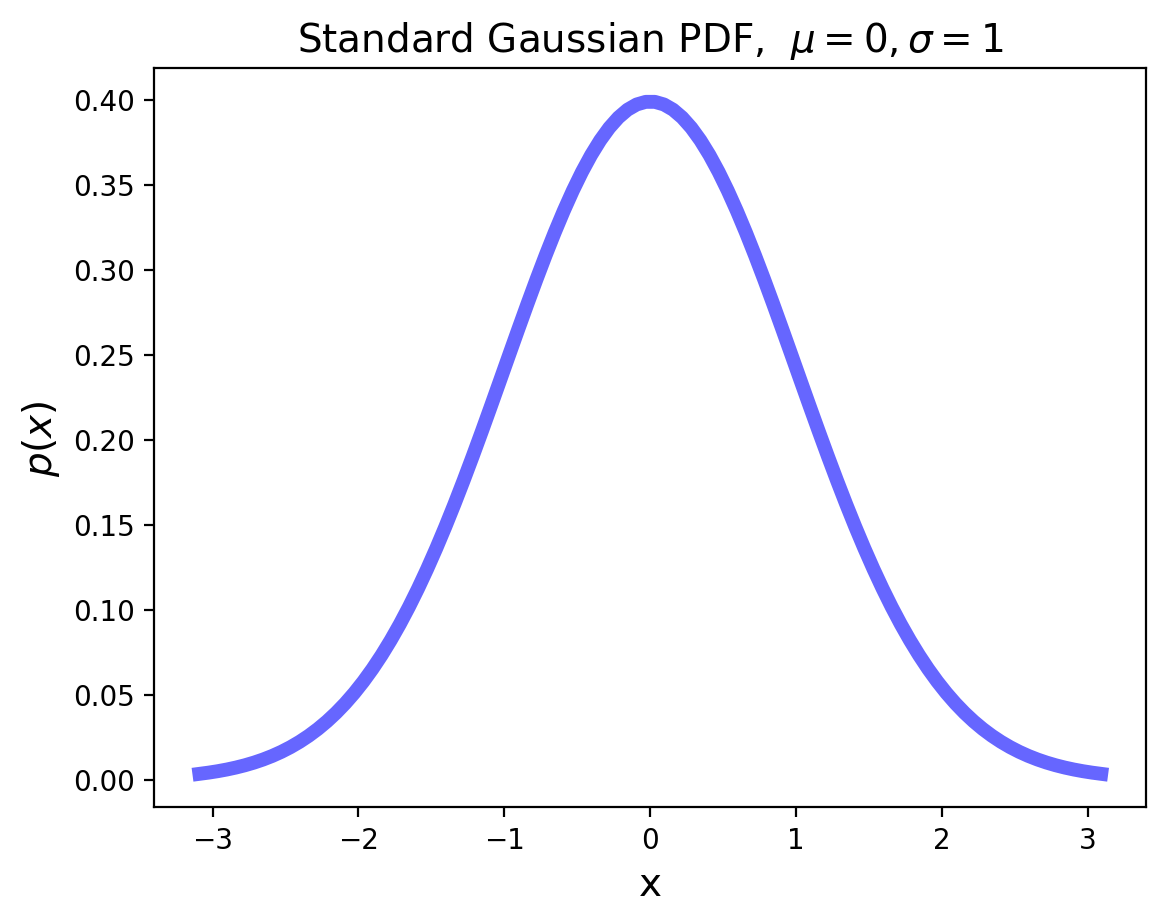

In [2]:
from scipy.stats import norm
plt.figure()
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
plt.plot(x, norm.pdf(x),'b-', lw = 5, alpha = 0.6)
plt.title(r'Standard Gaussian PDF,  $\mu = 0, \sigma = 1$', size=14)
plt.xlabel('x', size=14)
plt.ylabel(r'$p(x)$', size=14);

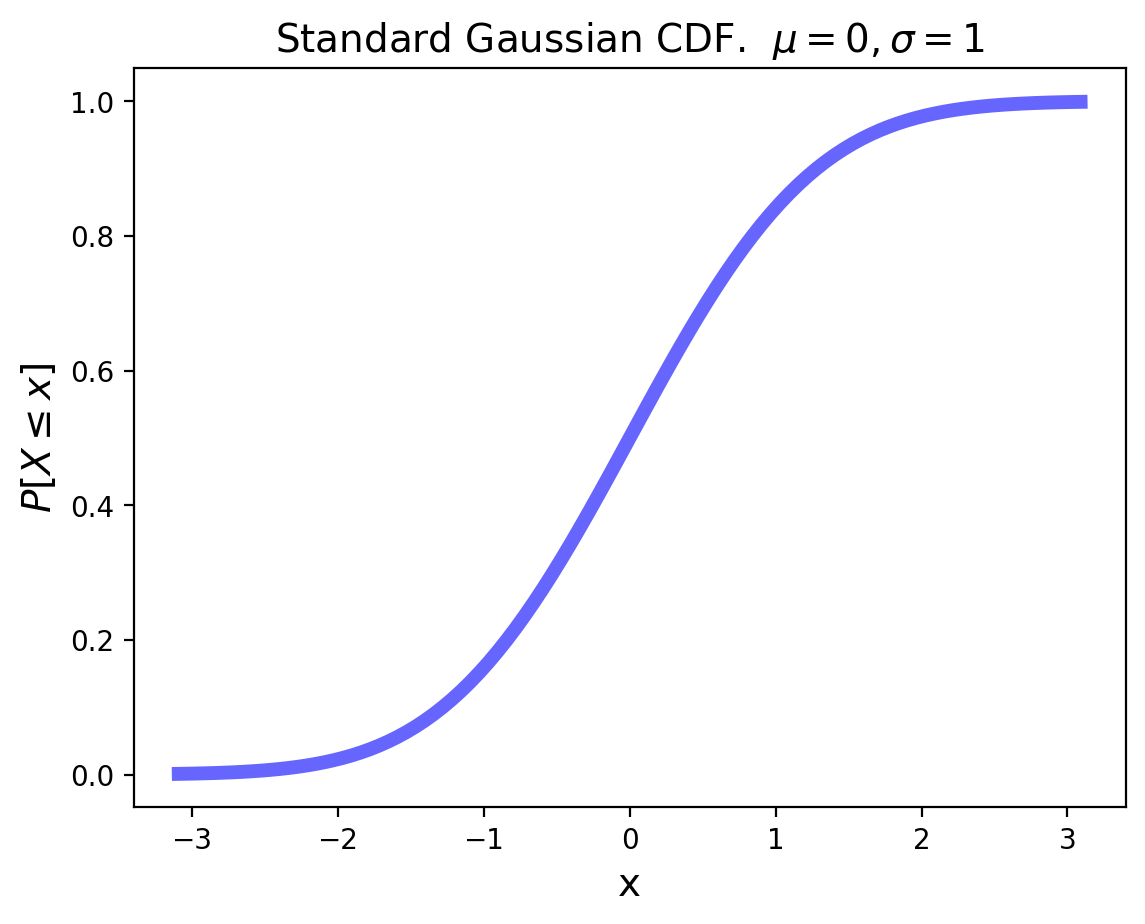

In [3]:
plt.figure()
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
plt.plot(x, norm.cdf(x),'b-', lw = 5, alpha = 0.6)
plt.title(r'Standard Gaussian CDF.  $\mu = 0, \sigma = 1$', size=14)
plt.xlabel('x', size=14)
plt.ylabel(r'$P[X\leq x]$', size=14);

For an arbitrary Gaussian distribution with mean $\mu$ and variance
$\sigma^2$, the PDF is simply the standard Gaussian that is relocated to
have its center at $\mu$ and its width scaled by $\sigma$:

$$ f_{\mu,\sigma}(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}. $$

## The Exponential Distribution

The exponential distribution is an example of a continuous distribution. It concerns a Poisson process and has one parameter, $\lambda$, the rate of success.

__Definition.__ A continuous random variable whose PDF is given, for some $\lambda > 0$, by

$$f(x) = \;\left\{\begin{array}{cr} \lambda e^{-\lambda x} & \text
{for  } x \geq 0, \\ 0 & \text{otherwise}\end{array}\right.$$

is said to be _exponentially distributed_ with parameter $\lambda$.

The CDF, $F(a)$, of an exponential random variable is given by

$$F(a) = P(X \leq x) = 1 - e^{-\lambda x} \mbox{ for } x \geq 0.$$ 

Its mean is $1/\lambda$, and the variance is $1/\lambda^2$.

The exponential distribution answers the question: "What is the probability it takes time $x$ to obtain the first success?'' 

The exponential is the __continuous analog__ of the geometric distribution.

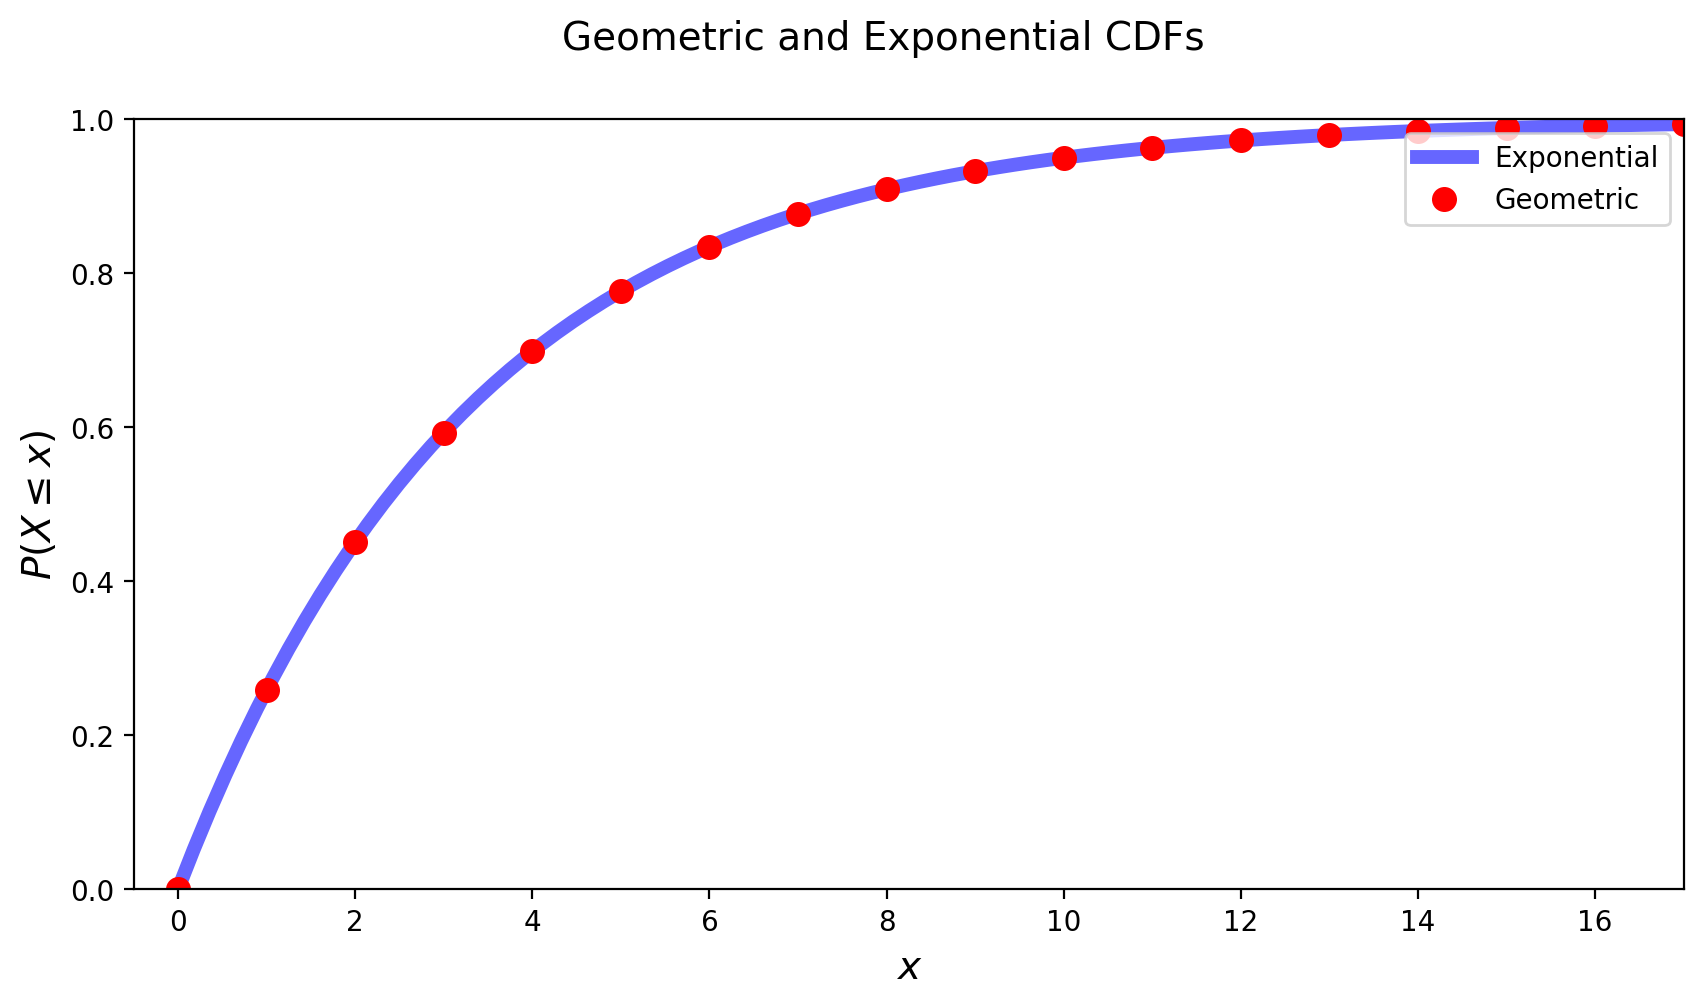

In [4]:
from scipy.stats import expon, geom
from math import exp
lam = 0.3
p = 1 - exp(- lam)
x = np.linspace(expon.ppf(0, scale=1/lam), expon.ppf(0.995, scale=1/lam), 100)
plt.figure(figsize=(10, 5))
plt.plot(x, expon.cdf(x, scale=1/lam),'b-', lw = 5, alpha = 0.6, label='Exponential')
xg = np.arange(geom.ppf(0, p), geom.ppf(0.995, p))
plt.ylim([0, 1])
plt.xlim([-0.5, max(xg)])
plt.plot(xg, geom.cdf(xg, p), 'ro', ms = 8, label = 'Geometric')
plt.suptitle(f'Geometric and Exponential CDFs', size = 14)
#plt.title(r'$\lambda = 0.3; \;\;\; p=1-e^{-\lambda} =$' + f' {p:0.3f}', size=12)
plt.xlabel(r'$x$', size=14)
plt.ylabel(r'$P(X \leq x)$', size = 14)
plt.legend(loc = 'best');

In the last two lectures we introduced the binomial, geometric, Poisson, and exponential distributions. Each of these four distributions describes either 

* Bernoulli trials with  probability $p$, or
* Poisson process with  rate $\lambda$.

In addition, each of the four distributions answers one of the following questions:

1. Given that a success has just occured, how many trials or how long until the next success?
2. In a fixed number of trials or amount of time, how many successes occur?

Based on this, we can create a table that might help us memorize these four distributions:

| |  Time (or Number of Trials) Until Success| Number of Successes in Fixed Time (or Number of Trials)  |
|-|:--:|:--:|
|__Bernoulli trials__| Geometric| Binomial |
|__Poisson process__| Exponential | Poisson|